# INF 552 - HW2 Submission Notebook
<font color='black'></font>
<font size="5"></font>

 ## STUDENT NAME : PRATEEK PARHI
 ## USC ID : 7461350213
 <br>

<br><br>
**1. Combined Cycle Power Plant Data Set**<br>
The dataset contains data points collected from a Combined Cycle Power Plant over
6 years (2006-2011), when the power plant was set to work with full load. Features
consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP),
Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical
energy output (EP) of the plant.

**(a)** Download the Combined Cycle Power Plantdata from: 
    https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from texttable import Texttable
import seaborn as sn
sn.set(style='ticks')

from scipy import stats
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

def read_Data():
    Data=pd.read_csv('https://raw.githubusercontent.com/prateekparhi936/HW-2-Dataset/master/CCPP/Power_Plant_Data.csv')
    return Data

Data=read_Data()

print(Data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
5     26.27  59.44  1012.23  58.77  443.67
6     15.89  43.96  1014.02  75.24  467.35
7      9.48  44.71  1019.12  66.43  478.42
8     14.64  45.00  1021.78  41.25  475.98
9     11.74  43.56  1015.14  70.72  477.50
10    17.99  43.72  1008.64  75.04  453.02
11    20.14  46.93  1014.66  64.22  453.99
12    24.34  73.50  1011.31  84.15  440.29
13    25.71  58.59  1012.77  61.83  451.28
14    26.19  69.34  1009.48  87.59  433.99
15    21.42  43.79  1015.76  43.08  462.19
16    18.21  45.00  1022.86  48.84  467.54
17    11.04  41.74  1022.60  77.51  477.20
18    14.45  52.75  1023.97  63.59  459.85
19    13.97  38.47  1015.15  55.28  464.30
20    17.76  42.42  1009.09  66.26  468.27
21     5.41  40.07  1019.16  64.77  495.24
22     7.76

<br><br><br>
**(b)** Exploring the data:<br>
i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [97]:
def Explore(Data):
    print("Number of ROWS in this Sheet: ",Data.shape[0],"\n")
    print("Number of COLUMNS in this Sheet: ",Data.shape[1],"\n")
    print("Rows represent the data points for each attribute and columns have the following label \n")
    print("AT - hourly average ambient variables Temperature\nV - Exhaust Vacuum\nAP - Ambient Pressure\nRH - Relative Humidity\nPE - hourly electrical energy output")
    print("\nIndependent Columns: AT,V,AP,and RH")
    print("Dependent Columns: PE")
    print("\n\n")
    
Explore(Data)

Number of ROWS in this Sheet:  9568 

Number of COLUMNS in this Sheet:  5 

Rows represent the data points for each attribute and columns have the following label 

AT - hourly average ambient variables Temperature
V - Exhaust Vacuum
AP - Ambient Pressure
RH - Relative Humidity
PE - hourly electrical energy output

Independent Columns: AT,V,AP,and RH
Dependent Columns: PE





ii. Make pairwise scatterplots of all the variables in the data set including the 
   predictors (independent variables) with the dependent variable. Describe your findings

There are some outliers in this dataset for each predictor
Relationship between AT and PE is strongly linear
Relationship between V and PE is strongly linear
Relationship between AP and PE is weakely linear and getting worse
Relationship between RH and PE is weakely linear and getting worse




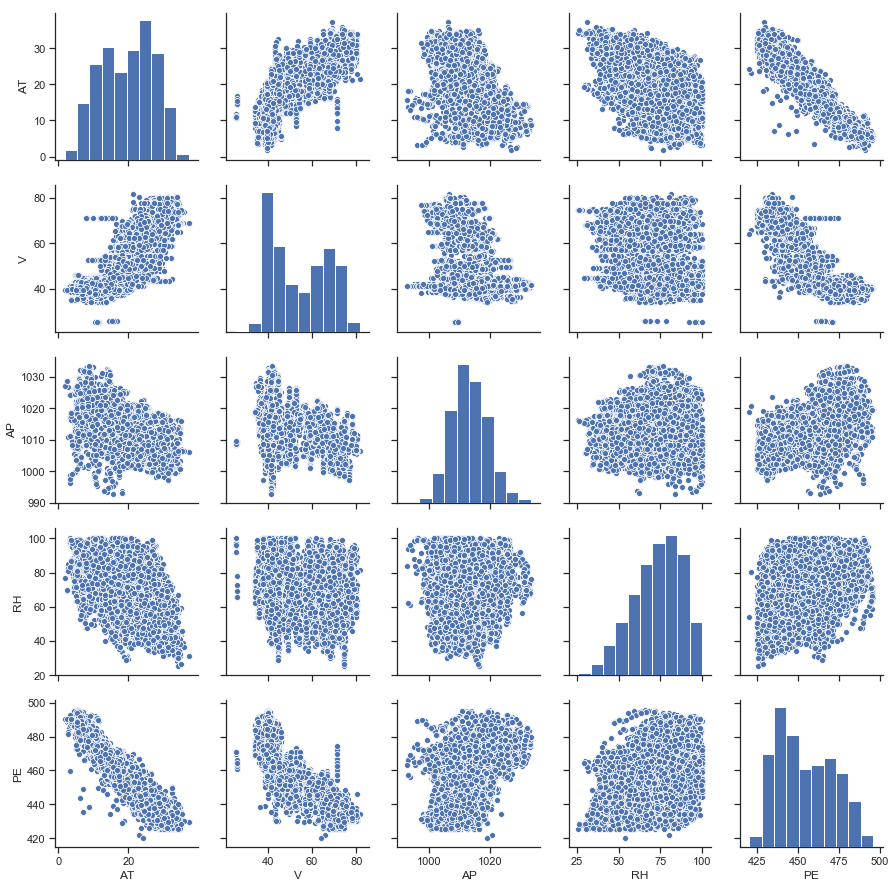

In [98]:
def Plot_ScatterPlots(Data):
    sn.pairplot(Data,palette='husl')
    print("There are some outliers in this dataset for each predictor")
    print("Relationship between AT and PE is strongly linear")
    print("Relationship between V and PE is strongly linear")
    print("Relationship between AP and PE is weakely linear and getting worse")
    print("Relationship between RH and PE is weakely linear and getting worse")
    print("\n")
    
Plot_ScatterPlots(Data)

<br><br><br>
iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges 
    of each of the variables in the dataset? Summarize them in a table.

In [99]:
def Describe_Data(Data): 
    table1=Texttable()
    table1.add_rows([['COLUMN','MEAN','MEDIAN','RANGE','FIRST QUARTILE','THIRD QUARTILE','IQR'],
                    ['AT',Data['AT'].mean(),Data['AT'].median(),Data['AT'].max()-Data['AT'].min(),Data['AT'].quantile(0.25),Data['AT'].quantile(0.75),Data['AT'].quantile(0.75)-Data['AT'].quantile(0.25)],
                    ['V',Data['V'].mean(),Data['V'].median(),Data['V'].max()-Data['V'].min(),Data['V'].quantile(0.25),Data['V'].quantile(0.75),Data['V'].quantile(0.75)-Data['V'].quantile(0.25)],
                    ['AP',Data['AP'].mean(),Data['AP'].median(),Data['AP'].max()-Data['AP'].min(),Data['AP'].quantile(0.25),Data['AP'].quantile(0.75),Data['AP'].quantile(0.75)-Data['AP'].quantile(0.25)],
                    ['RH',Data['RH'].mean(),Data['RH'].median(),Data['RH'].max()-Data['RH'].min(),Data['RH'].quantile(0.25),Data['RH'].quantile(0.75),Data['RH'].quantile(0.75)-Data['RH'].quantile(0.25)],
                    ['PE',Data['PE'].mean(),Data['PE'].median(),Data['PE'].max()-Data['PE'].min(),Data['PE'].quantile(0.25),Data['PE'].quantile(0.75),Data['PE'].quantile(0.75)-Data['PE'].quantile(0.25)]])

    print("Summary of Data: \n",table1.draw(),"\n\n")
    
Describe_Data(Data)

Summary of Data: 
 +--------+----------+----------+--------+--------------+--------------+--------+
| COLUMN |   MEAN   |  MEDIAN  | RANGE  |    FIRST     |    THIRD     |  IQR   |
|        |          |          |        |   QUARTILE   |   QUARTILE   |        |
+========+==========+==========+========+==============+==============+========+
| AT     | 19.651   | 20.345   | 35.300 | 13.510       | 25.720       | 12.210 |
+--------+----------+----------+--------+--------------+--------------+--------+
| V      | 54.306   | 52.080   | 56.200 | 41.740       | 66.540       | 24.800 |
+--------+----------+----------+--------+--------------+--------------+--------+
| AP     | 1013.259 | 1012.940 | 40.410 | 1009.100     | 1017.260     | 8.160  |
+--------+----------+----------+--------+--------------+--------------+--------+
| RH     | 73.309   | 74.975   | 74.600 | 63.328       | 84.830       | 21.502 |
+--------+----------+----------+--------+--------------+--------------+--------+
| PE     

<br><br><br>
**(c)** For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

Simple Linear Regression Model- 1  , where Predictor= AT  and Response= PE

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Summary of OLS: 
                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.730e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:55:30   Log-Likelihood:                -5933.9
No. Observations:                1914   AIC:                         1.187e+04
Df Residuals:                    1912   BIC:                         1.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    s

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


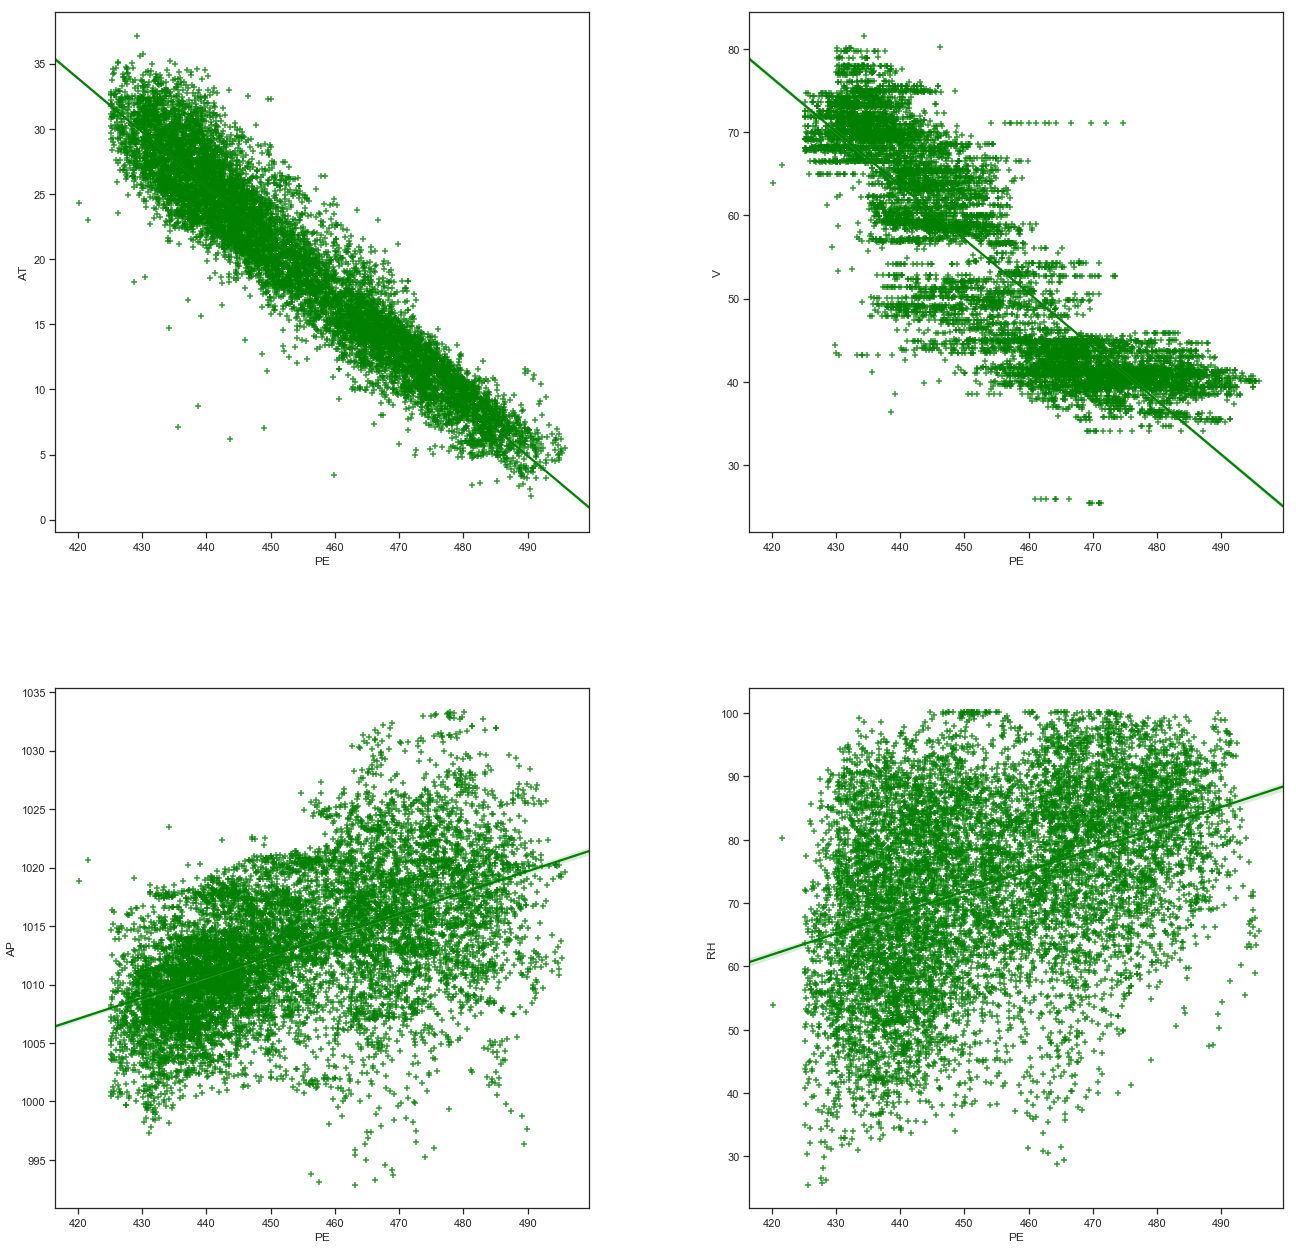

In [100]:
## fitting a simple linear regression model for each of the predictors
def fit_simple_linear_regression(Data):
    lin_reg_coeff=np.empty([4])  ## I will use this array later to plot coefficients in (e) part
    columns=['AT','V','AP','RH']
    i=0
    for i,col in enumerate(columns):
        print("Simple Linear Regression Model-",i+1," , where Predictor=",col," and Response= PE\n")
        X=Data[[col]]
        Y=Data[['PE']]
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
        Simple_Lin_Regression=LinearRegression().fit(X_train,Y_train)
        print(Simple_Lin_Regression)
        lin_reg_coeff[i]=Simple_Lin_Regression.coef_
        Y_predict=Simple_Lin_Regression.predict(X_test)
        X_test=sm.add_constant(X_test)
        print("\nSummary of OLS: \n", OLS(Y_test,X_test).fit().summary())
        print("\n")


    ## all the predictors are significant but there exists outliers in the data
    print("\n--> Linear Regression Coeff: ",lin_reg_coeff)
    print("--> All the simple linear regression models here have statistically significant association between predictor and response with a p value less than 0.05")
    print("--> Yes there are some outliers which exists in features of this dataset")
    print("\n\n")
    
    ## plot between predictor and response
    print("-------  The Plot below shows(asserts) the relation between predictors and response ---------\n")
    handle=plt.figure(figsize=(22,22))
    handle.subplots_adjust(hspace=0.3,wspace=0.3)
    for i,col in enumerate(columns):
        handle.add_subplot(2,2,i+1)
        sn.regplot(y=col,x='PE',data=Data,marker='+',color='green')
    
    return lin_reg_coeff



lin_reg_coeff=fit_simple_linear_regression(Data)

lin_reg_coeff=lin_reg_coeff.reshape(4,1)




 ------------ ** Simple Linear Regression after removing outlier ** -----------


Removing the outliers from the data using Z score by setting the threshold as 2
That is all data which are -2 or +2 standard deviation away from the mean will be discarded

Simple Linear Regression Model- 1  , where Predictor= AT  and Response= PE

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Summary of OLS: 
                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 1.374e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:55:33   Log-Likelihood:                -5340.4
No. Observations:                1722   AIC:                         1.068e+04
Df Res

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


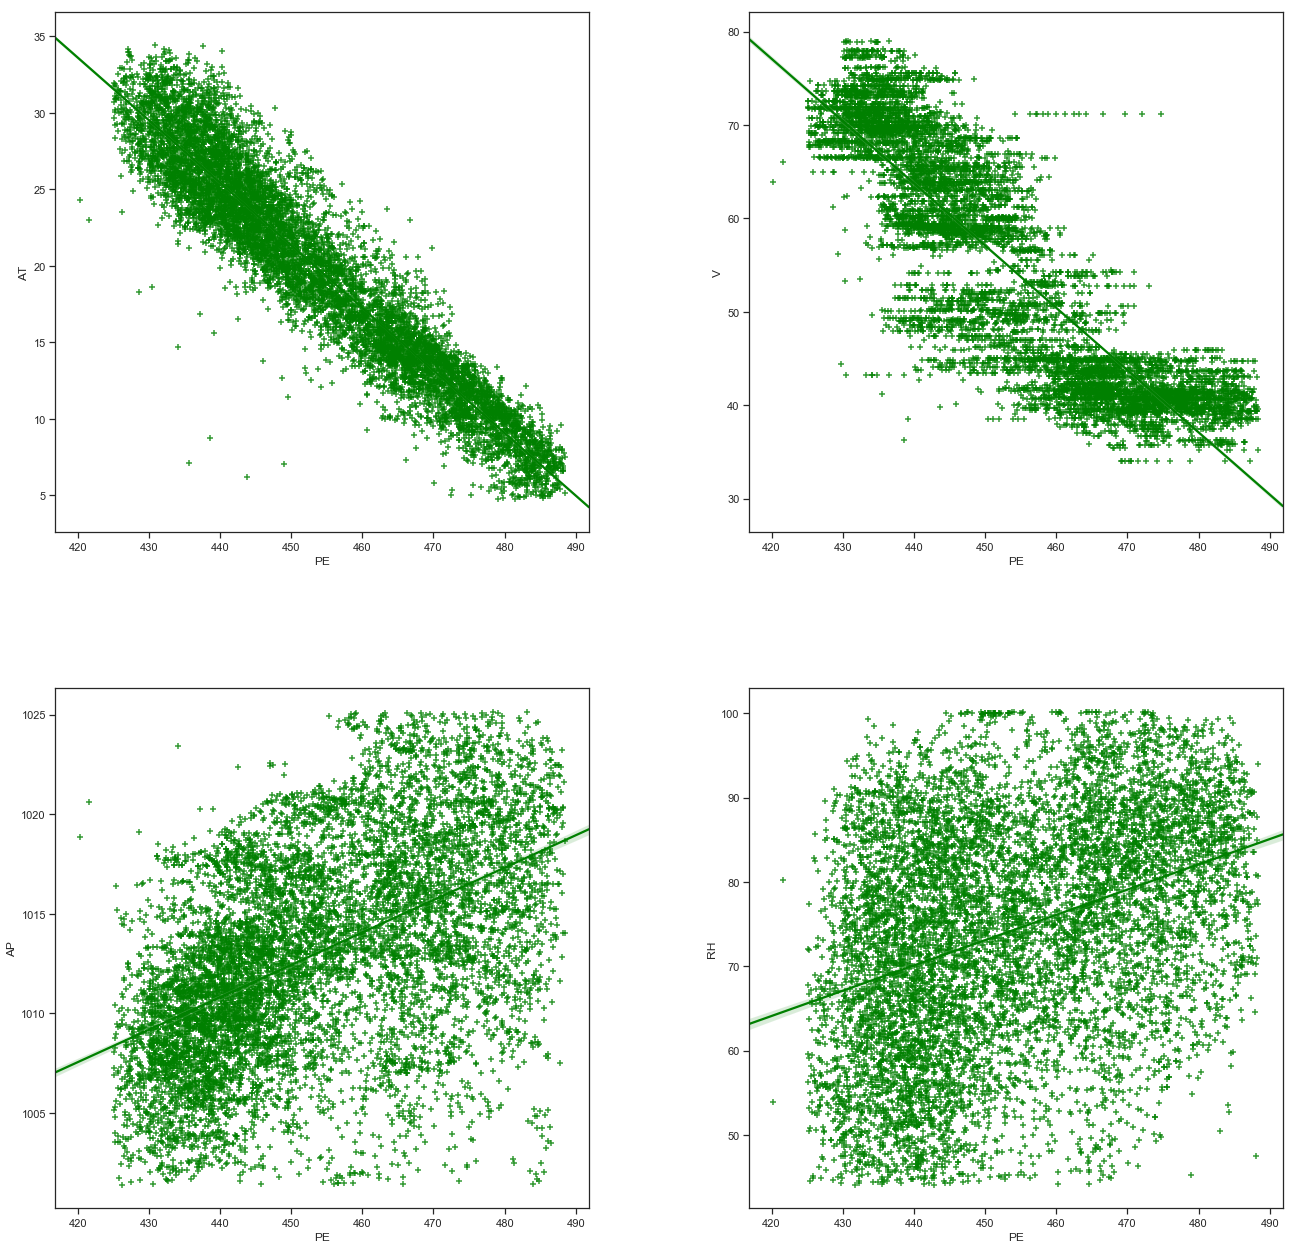

In [101]:
## Removing the outliers from the data using Z score by setting the threshold as 2. 
## That is all data which are -2 or +2 standard deviation away from the mean will be discarded.

def remove_outliers():
    print("\n\n ------------ ** Simple Linear Regression after removing outlier ** -----------\n\n")
    print("Removing the outliers from the data using Z score by setting the threshold as 2")
    print("That is all data which are -2 or +2 standard deviation away from the mean will be discarded\n")
    DataCopy=Data
    z=np.abs(stats.zscore(DataCopy))
    Data_without_outlier=DataCopy[(z<2).all(axis=1)]
    
    ## Run Linear Regression again after filtering the outliers
    fit_simple_linear_regression(Data_without_outlier)
    return Data_without_outlier


Data_without_outlier = remove_outliers()

<br><br><br>
**(d)** Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [103]:
def multiple_regression(Data):
    print("Multiple Linear Regression Model")
    print(dmatrices('PE ~ AT+V+AP+RH',Data),"\n")
    Y,X=dmatrices('PE ~ AT+V+AP+RH',Data)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
    Lin_Regression=LinearRegression().fit(X_train,Y_train)
    Mul_Reg_score=Lin_Regression.score(X_test,Y_test)
    X_train=pd.DataFrame(X_train)
    X_test=pd.DataFrame(X_test)
    Y_train=pd.DataFrame(Y_train)
    Y_test=pd.DataFrame(Y_test)
    X_train.columns=['Intercept','AT','V','AP','RH']
    X_test.columns=['Intercept','AT','V','AP','RH']
    Y_train.columns=['PE']
    Y_test.columns=['PE']
    Mul_Regression=OLS(Y_train,X_train).fit()
    print(Mul_Regression.summary())
    
    ## Storing coefficients to use in (e) part
    mul_reg_coeff=np.zeros(shape=[4,1])
    list1=Mul_Regression.params
    for i,val in enumerate(list1):
        if i!=0:
            mul_reg_coeff[i-1]=val
    print("\n---> All Predictors in this dataset are statistically significant so we can safely reject the null Hypothesis")
    return mul_reg_coeff,Mul_Reg_score
    
    
mul_reg_coeff,Mul_Reg_score=multiple_regression(Data)

Multiple Linear Regression Model
(DesignMatrix with shape (9568, 1)
      PE
  463.26
  444.37
  488.56
  446.48
  473.90
  443.67
  467.35
  478.42
  475.98
  477.50
  453.02
  453.99
  440.29
  451.28
  433.99
  462.19
  467.54
  477.20
  459.85
  464.30
  468.27
  495.24
  483.80
  443.61
  436.06
  443.25
  464.16
  475.52
  484.41
  437.89
  [9538 rows omitted]
  Terms:
    'PE' (column 0)
  (to view full data, use np.asarray(this_obj)), DesignMatrix with shape (9568, 5)
  Intercept     AT      V       AP     RH
          1  14.96  41.76  1024.07  73.17
          1  25.18  62.96  1020.04  59.08
          1   5.11  39.40  1012.16  92.14
          1  20.86  57.32  1010.24  76.64
          1  10.82  37.50  1009.23  96.62
          1  26.27  59.44  1012.23  58.77
          1  15.89  43.96  1014.02  75.24
          1   9.48  44.71  1019.12  66.43
          1  14.64  45.00  1021.78  41.25
          1  11.74  43.56  1015.14  70.72
          1  17.99  43.72  1008.64  75.04
          1  20

<br><br><br>
**(e)** How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coefficients from 1c on the x-axis, and the
multiple regression coefficients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis.

-------- plot displaying the univariate regression coefficients -----------

+---------+--------------------------------+-----------------------------------+
| feature | linear regression coefficients |    multiple linear regression     |
|         |                                |           coefficients            |
+=========+================================+===================================+
| AT      | -2.177                         | -1.986                            |
+---------+--------------------------------+-----------------------------------+
| V       | -1.168                         | -0.232                            |
+---------+--------------------------------+-----------------------------------+
| AP      | 1.490                          | 0.062                             |
+---------+--------------------------------+-----------------------------------+
| RH      | 0.455                          | -0.158                            |
+---------+---------------------

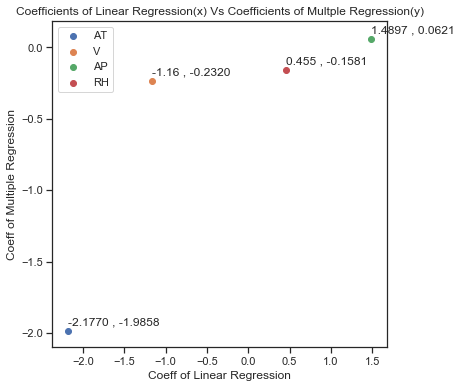

In [105]:
# Plot coefficients of linear and multiple regression models for each feature
def plot_coefficients(lin_reg_coeff,mul_reg_coeff):
    print("-------- plot displaying the univariate regression coefficients -----------\n")
    columns=['AT','V','AP','RH']
    plt.figure(figsize=(6,6))
    plt.title("Coefficients of Linear Regression(x) Vs Coefficients of Multple Regression(y)")
    table1=Texttable()
    
    for i,b in enumerate(columns):
        table1.add_rows([['feature','linear regression coefficients','multiple linear regression coefficients'],
                         [b,lin_reg_coeff[i],mul_reg_coeff[i]]])
        str1=str(lin_reg_coeff[i])
        str2=str(mul_reg_coeff[i])
        string=str1[1:len(str1)-5]+" , "+str2[1:len(str2)-5]
        plt.scatter(lin_reg_coeff[i],mul_reg_coeff[i],label=b)
        plt.annotate(string,(lin_reg_coeff[i],mul_reg_coeff[i]),
                     xytext=(lin_reg_coeff[i],mul_reg_coeff[i]+0.04))
        
    print(table1.draw(),"\n")
    plt.legend()
    plt.xlabel("Coeff of Linear Regression")
    plt.ylabel("Coeff of Multiple Regression")
    plt.show()

    
    
plot_coefficients(lin_reg_coeff,mul_reg_coeff)

<br><br><br>
**(f)** Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y = β0 + β1*X + β2*X^2 + β3*X^3 + error

In [106]:
def polynomial_regression(Data):
    columns=['AT','V','AP','RH']
    print("Fitting each predictor X in the polynomial regression(degree=3) model (β0 + β1X + β2X^2 + β3*X^3 + error): \n")
    for i,col in enumerate(columns):
        print("(",i+1,") Polynomial Regression of Degree(3) for Predictor = ",col," ------------  \n")
        print(dmatrices('PE ~ %s +I(%s**2)+ I(%s**3)' % (col,col,col),Data),"\n")
        Y,X=dmatrices('PE ~ %s +I(%s**2)+ I(%s**3)' % (col,col,col),Data)
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
        X_train=pd.DataFrame(X_train)
        X_test=pd.DataFrame(X_test)
        Y_train=pd.DataFrame(Y_train)
        Y_test=pd.DataFrame(Y_test)
        X_test.columns=['intercept','%s'  % (col),'%s**2'%(col),'%s**3'%(col)]
        X_train.columns=['intercept','%s' % (col),'%s**2'%(col),'%s**3'%(col)]
        Y_train.columns=['PE']
        Y_test.columns=['PE']
        Poly_Reg=OLS(Y_train,X_train).fit()
        Lin_Regression=LinearRegression()
        Lin_Regression.fit(X_train,Y_train)
        Y_predict=Lin_Regression.predict(X_test)
        print(Poly_Reg.summary(),"\n")
    print("------> V^2, V^3 are not statistically Significant because p values are greater than 0.05")
    print("------> Yes there are evidence of non linear association predictor and response")

    
polynomial_regression(Data)

Fitting each predictor X in the polynomial regression(degree=3) model (β0 + β1X + β2X^2 + β3*X^3 + error): 

( 1 ) Polynomial Regression of Degree(3) for Predictor =  AT  ------------  

(DesignMatrix with shape (9568, 1)
      PE
  463.26
  444.37
  488.56
  446.48
  473.90
  443.67
  467.35
  478.42
  475.98
  477.50
  453.02
  453.99
  440.29
  451.28
  433.99
  462.19
  467.54
  477.20
  459.85
  464.30
  468.27
  495.24
  483.80
  443.61
  436.06
  443.25
  464.16
  475.52
  484.41
  437.89
  [9538 rows omitted]
  Terms:
    'PE' (column 0)
  (to view full data, use np.asarray(this_obj)), DesignMatrix with shape (9568, 4)
  Intercept     AT  I(AT ** 2)   I(AT ** 3)
          1  14.96    223.8016   3348.07194
          1  25.18    634.0324  15964.93583
          1   5.11     26.1121    133.43283
          1  20.86    435.1396   9077.01206
          1  10.82    117.0724   1266.72337
          1  26.27    690.1129  18129.26588
          1  15.89    252.4921   4012.09947
          1  

<br><br><br>
**(g)** Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.

In [109]:
def regression_with_pairwise_interaction(Data):
    print("Full Linear Regression Model with all Pairwise Interaction terms\n")
    print(dmatrices('PE~AT+V+AP+RH+AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH',Data),"\n")
    Y,X=dmatrices('PE~AT+V+AP+RH+AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH',Data)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
    X_train=pd.DataFrame(X_train)
    X_test=pd.DataFrame(X_test)
    Y_test=pd.DataFrame(Y_test)
    Y_train=pd.DataFrame(Y_train)
    X_train.columns=['Intercept','AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH']
    X_test.columns=['Intercept','AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH']
    Y_test.columns=['PE']
    Y_train.columns=['PE']
    reg_pairwise=OLS(Y_train,X_train).fit()
    Lin_Regression=LinearRegression()
    Lin_Regression.fit(X_train,Y_train)
    Y_predict=Lin_Regression.predict(X_test)
    reg_pairwise_score=Lin_Regression.score(X_test,Y_test)
    print(reg_pairwise.summary())
    print("\n-----> AT:V , AT:RH , and V:AP are the statistically Significant interaction terms or Pairs")
    
    
regression_with_pairwise_interaction(Data)


## AT:V, AT:RH,V:AP are statistically significant pairs

Full Linear Regression Model with all Pairwise Interaction terms

(DesignMatrix with shape (9568, 1)
      PE
  463.26
  444.37
  488.56
  446.48
  473.90
  443.67
  467.35
  478.42
  475.98
  477.50
  453.02
  453.99
  440.29
  451.28
  433.99
  462.19
  467.54
  477.20
  459.85
  464.30
  468.27
  495.24
  483.80
  443.61
  436.06
  443.25
  464.16
  475.52
  484.41
  437.89
  [9538 rows omitted]
  Terms:
    'PE' (column 0)
  (to view full data, use np.asarray(this_obj)), DesignMatrix with shape (9568, 11)
  Columns:
    ['Intercept',
     'AT',
     'V',
     'AP',
     'RH',
     'AT:V',
     'AT:AP',
     'AT:RH',
     'V:AP',
     'V:RH',
     'AP:RH']
  Terms:
    'Intercept' (column 0)
    'AT' (column 1)
    'V' (column 2)
    'AP' (column 3)
    'RH' (column 4)
    'AT:V' (column 5)
    'AT:AP' (column 6)
    'AT:RH' (column 7)
    'V:AP' (column 8)
    'V:RH' (column 9)
    'AP:RH' (column 10)
  (to view full data, use np.asarray(this_obj))) 

                            OL

<br><br><br>
**(h)** Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs.

In [110]:
def regression_model_with_all_predictors(Data):
    print("Train the regression model on a randomly selected 70% subset of the data with all predictors\n")
    print(dmatrices('PE ~ AT+V+AP+RH',Data),"\n")
    Y,X=dmatrices('PE ~ AT+V+AP+RH',Data)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
    X_train=pd.DataFrame(X_train)
    X_test=pd.DataFrame(X_test)
    Y_train=pd.DataFrame(Y_train)
    Y_test=pd.DataFrame(Y_test)
    X_train.columns=['Intercept','AT','V','AP','RH']
    X_test.columns=['Intercept','AT','V','AP','RH']
    Y_train.columns=['PE']
    Y_train.columns=['PE']
    print("X train size ",X_train.shape)
    print("X test size ",X_test.shape)
    print("Y train size ",Y_train.shape)
    print("Y test size ",Y_test.shape)
    print("\n")
    Lin_Regression=LinearRegression().fit(X_train,Y_train)
    Y_predict_test1=Lin_Regression.predict(X_test)
    Y_predict_train1=Lin_Regression.predict(X_train)
    mse_test1=mean_squared_error(Y_predict_train1,Y_train)
    mse_train1=mean_squared_error(Y_predict_test1,Y_test)
    Full_Regression=OLS(Y_train,X_train).fit()
    print(Full_Regression.summary())
    print("\n\nMSE of Regression Model with all predictors : ")
    print("Train MSE: ",mse_train1,"   ||     Test MSE: ",mse_test1)  
    print("\n\n")

    
    
    
def full_regression_model(Data):
    print("\n\n----------------------------------------********------------------------------------------\n\n")
    print("Full Regression Model with all possible interaction terms and quadratic nonlinearities\n")
    print(dmatrices('PE ~ AT+V+AP+RH+(AT*V)+(AT*AP)+(AT*RH)+(V*AP)+(V*RH)+(AP*RH)+I(AT**2)+I(V**2)+I(AP**2)+I(RH**2)',Data),"\n")
    Y,X=dmatrices('PE ~ AT+V+AP+RH+(AT*V)+(AT*AP)+(AT*RH)+(V*AP)+(V*RH)+(AP*RH)+I(AT**2)+I(V**2)+I(AP**2)+I(RH**2)',Data)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
    X_train=pd.DataFrame(X_train)
    X_test=pd.DataFrame(X_test)
    Y_train=pd.DataFrame(Y_train)
    Y_test=pd.DataFrame(Y_test)
    X_train.columns=['Intercept','AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH','I(AT**2)','I(V**2)','I(AP**2)','I(RH**2)']
    X_test.columns=['Intercept','AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH','I(AT**2)','I(V**2)','I(AP**2)','I(RH**2)']
    Y_train.columns=['PE']
    Y_train.columns=['PE']
    print("Train the regression model on a randomly selected 70% subset of the data with all predictors,interaction terms and quadratic terms. \n")
    print("X train size ",X_train.shape)
    print("X test size ",X_test.shape)
    print("Y train size ",Y_train.shape)
    print("Y test size ",Y_test.shape)
    print("\n")
    Lin_Regression=LinearRegression().fit(X_train,Y_train)
    Y_predict_test1=Lin_Regression.predict(X_test)
    Y_predict_train1=Lin_Regression.predict(X_train)
    mse_test1=mean_squared_error(Y_predict_train1,Y_train)
    mse_train1=mean_squared_error(Y_predict_test1,Y_test)
    Full_Regression=OLS(Y_train,X_train).fit()
    print(Full_Regression.summary())
    print("\n\nMSE of Full Regression Model(All terms) : ")
    print("Train MSE: ",mse_train1,"   ||     Test MSE: ",mse_test1)
    
    print("\n The following terms are insignificant: AT, V ,AT*AP ,V*AP, V*RH, V**2 because their p values are greater than 0.05")

    
    
    
def full_regression_model_with_significant_terms(Data):
    print("\n\n----------------------------------------********------------------------------------------\n\n")
    print("Full Regression Model with only significant terms\n")
    print(dmatrices('PE ~ AP+RH+(AT:V)+(AT:RH)+(AP:RH)+I(AT**2)+I(AP**2)+I(RH**2)',Data),"\n")
    Y,X=dmatrices('PE ~ AP+RH+(AT:V)+(AT:RH)+(AP:RH)+I(AT**2)+I(AP**2)+I(RH**2)',Data)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
    print(X_train.shape,"\n")
    print(Y_train.shape,"\n")
    print(X_test.shape,"\n")
    print(Y_test.shape,"\n")
    X_train=pd.DataFrame(X_train)
    X_test=pd.DataFrame(X_test)
    Y_train=pd.DataFrame(Y_train)
    Y_test=pd.DataFrame(Y_test)
    X_train.columns=['Intercept','AP','RH','AT:V','AT:RH','AP*RH','I(AT**2)','I(AP**2)','I(RH**2)']
    X_test.columns=['Intercept','AP','RH','AT:V','AT:RH','AP*RH','I(AT**2)','I(AP**2)','I(RH**2)']
    Y_train.columns=['PE']
    Y_train.columns=['PE']
    print("Train the regression model on a randomly selected 70% subset of the data with only significant predictors. \n")
    print("X train size ",X_train.shape)
    print("X test size ",X_test.shape)
    print("Y train size ",Y_train.shape)
    print("Y test size ",Y_test.shape)
    print("\n")
    Lin_Regression=LinearRegression().fit(X_train,Y_train)
    Y_predict_test2=Lin_Regression.predict(X_test)
    Y_predict_train2=Lin_Regression.predict(X_train)
    mse_test2=mean_squared_error(Y_predict_train2,Y_train)
    mse_train2=mean_squared_error(Y_predict_test2,Y_test)
    Full_Regression=OLS(Y_train,X_train).fit()
    print(Full_Regression.summary())
    print("\n\nMSE of Regression model with only statistically significant terms : ")
    print("Train MSE: ",mse_train2,"   ||     Test MSE: ",mse_test2)
    
    
    
    
regression_model_with_all_predictors(Data)
    
full_regression_model(Data)

full_regression_model_with_significant_terms(Data)
    

Train the regression model on a randomly selected 70% subset of the data with all predictors

(DesignMatrix with shape (9568, 1)
      PE
  463.26
  444.37
  488.56
  446.48
  473.90
  443.67
  467.35
  478.42
  475.98
  477.50
  453.02
  453.99
  440.29
  451.28
  433.99
  462.19
  467.54
  477.20
  459.85
  464.30
  468.27
  495.24
  483.80
  443.61
  436.06
  443.25
  464.16
  475.52
  484.41
  437.89
  [9538 rows omitted]
  Terms:
    'PE' (column 0)
  (to view full data, use np.asarray(this_obj)), DesignMatrix with shape (9568, 5)
  Intercept     AT      V       AP     RH
          1  14.96  41.76  1024.07  73.17
          1  25.18  62.96  1020.04  59.08
          1   5.11  39.40  1012.16  92.14
          1  20.86  57.32  1010.24  76.64
          1  10.82  37.50  1009.23  96.62
          1  26.27  59.44  1012.23  58.77
          1  15.89  43.96  1014.02  75.24
          1   9.48  44.71  1019.12  66.43
          1  14.64  45.00  1021.78  41.25
          1  11.74  43.56  1015.14  70

<br><br><br>
**(i)** KNN Regression:
1. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k= { 1,2,....,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

Normalized Features for KNN by Scaling each input vector individually to unit norm (vector length).

            AT         V        AP        RH        PE
0     0.013271  0.037047  0.908482  0.064911  0.410972
1     0.022557  0.056403  0.913802  0.052927  0.398089
2     0.004529  0.034918  0.897008  0.081657  0.432977
3     0.018812  0.051694  0.911079  0.069117  0.402655
4     0.009662  0.033488  0.901247  0.086282  0.423195
5     0.023695  0.053614  0.913020  0.053010  0.400185
6     0.014187  0.039248  0.905339  0.067176  0.417260
7     0.008399  0.039611  0.902904  0.058855  0.423863
8     0.012968  0.039860  0.905070  0.036538  0.421612
9     0.010436  0.038721  0.902373  0.062864  0.424457
10    0.016218  0.039414  0.909295  0.067649  0.408400
11    0.018069  0.042104  0.910321  0.057616  0.407305
12    0.021950  0.066281  0.911986  0.075885  0.397048
13    0.023114  0.052673  0.910496  0.055586  0.405708
14    0.023706  0.062763  0.913729  0.079282  0.392825
15    0.019162  0.0

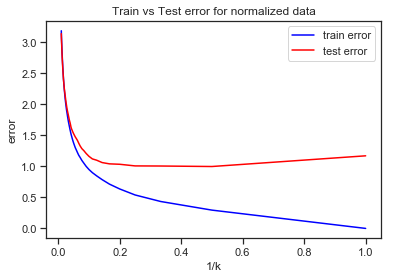


------- KNN Regression with Raw Features ---------



Most Suitable K(Best Fit):  6 
Max Score (R^Square*100):  94.78351221229931


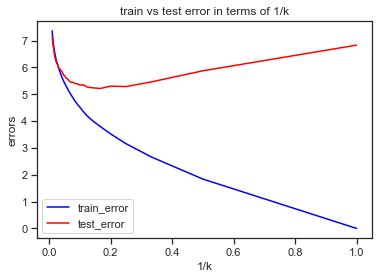

In [114]:
def Normalize_Data(DataNorm):
    columns=['AT','V','AP','RH','PE']
    ## Scale input vectors individually to unit norm (vector length).
    DataNorm=preprocessing.normalize(DataNorm)
    DataNorm=pd.DataFrame(DataNorm)
    DataNorm.columns=columns
    print("Normalized Features for KNN by Scaling each input vector individually to unit norm (vector length).\n")
    print(DataNorm) 
    return DataNorm




def KNN_Regression_Normalized(Data):
    print("\n\n------------ KNN Regression with Normalized Features ------------\n")
    columns=['AT','V','AP','RH']
    k_neighbors=np.arange(1,101,1)
    maxScore_norm=0
    most_suitable_k=1
    train_error=np.empty([100])
    test_error=np.empty([100])
    X=DataNorm[columns]
    Y=DataNorm['PE']
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
    for i,k in enumerate(k_neighbors):
        KNN_Reg=KNeighborsRegressor(n_neighbors=k,weights='uniform',p=2,algorithm='auto')
        KNN_Reg.fit(X_train,Y_train)
        Y_test_predict=KNN_Reg.predict(X_test)
        Y_train_predict=KNN_Reg.predict(X_train)
        score=KNN_Reg.score(X_test,Y_test)
        train_error[i]=(1-KNN_Reg.score(X_train,Y_train))*100
        test_error[i]=(1-KNN_Reg.score(X_test,Y_test))*100
        if(score>maxScore_norm):
            maxScore_norm=score
            most_suitable_k=k

    print("Most Suitable K(Best Fit): ",most_suitable_k,"\nMax Score (R^Square*100): ",maxScore_norm*100)
    k_neighbors=[1/i for i in range(1,101,1)]

    plt.title("Train vs Test error for normalized data")
    plt.plot(k_neighbors,train_error,label='train error',color='blue')
    plt.plot(k_neighbors,test_error,label='test error',color='red')
    plt.legend()
    plt.xlabel('1/k')
    plt.ylabel('error')
    plt.show()
    
    return maxScore_norm
    

    
    
def KNN_Regression_Raw(Data):
    print("\n------- KNN Regression with Raw Features ---------\n")
    columns=['AT','V','AP','RH']
    test_error=np.empty([100])
    train_error=np.empty([100])
    k_neighbors=np.arange(1,101,1)
    most_suitable_k=0
    X=Data[columns]
    Y=Data['PE']
    maxScore_knn_raw=0

    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
    print("\n")
    for i,k in enumerate(k_neighbors):
        KNN_Reg=KNeighborsRegressor(n_neighbors=k,p=2,weights='uniform',algorithm='auto')
        KNN_Reg.fit(X_train,Y_train)
        Y_predict=KNN_Reg.predict(X_test)
        score=KNN_Reg.score(X_test,Y_test)
        train_error[i]=(1-KNN_Reg.score(X_train,Y_train))*100
        test_error[i]=(1-KNN_Reg.score(X_test,Y_test))*100
        if(score > maxScore_knn_raw):
            maxScore_knn_raw=score
            most_suitable_k=k

    print("Most Suitable K(Best Fit): ",most_suitable_k,"\nMax Score (R^Square*100): ", maxScore_knn_raw*100)

    k_neighbors=[1/i for i in range(1,101,1)]

    plt.title("train vs test error in terms of 1/k")
    plt.plot(k_neighbors,train_error,color='blue',label='train_error')
    plt.plot(k_neighbors,test_error,color='red',label='test_error')
    plt.legend()
    plt.xlabel('1/k')
    plt.ylabel('errors')
    plt.show()
    
    return maxScore_knn_raw
    


DataNorm=Normalize_Data(Data)
maxScore_norm=KNN_Regression_Normalized(DataNorm)
maxScore_knn_raw=KNN_Regression_Raw(Data)

<br><br><br>
**(j)** Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

In [115]:
## Linear Regression(lowest test error) vs KNN
## So multiple linear regression has the lowest test error among all the linear regression model
## Also KNN on Normalized Data gave the best score
print("Accuracy of Multiple Linear regression",(Mul_Reg_score)*100)
print("Accuracy of KNN Normalized ",(maxScore_norm)*100)
print("\n")
print("Lowest Test error of Multiple Linear regression",(1-Mul_Reg_score)*100)
print("Lowest Test error of KNN Normalized ",(1-maxScore_norm)*100)

print("\nTherefore KNN Regression Normalized version performs better than Linear Regression Models")

## In summary KNN Regression Normalized performs better than Linear Regression for prediction on this dataset

Accuracy of Multiple Linear regression 93.01046431962187
Accuracy of KNN Normalized  99.00233536533993


Lowest Test error of Multiple Linear regression 6.989535680378123
Lowest Test error of KNN Normalized  0.997664634660067

Therefore KNN Regression Normalized version performs better than Linear Regression Models
